In [1]:
import seaborn as sns
import pandas as pd

In [52]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic.to_csv('./data/titanic.csv', index=True, encoding='utf-8')

In [54]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 중앙값
median = titanic.age.median()
median

28.0

In [55]:
# 나이 결측치 치환
titanic['age'] = titanic['age'].fillna(median)

In [7]:
# 승선장소 확인
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [56]:
# 승선장소 대부분이 S이기때문에 결측치2개도 S로 할당
titanic.embarked = titanic.embarked.fillna('S')

In [57]:
titanic.embark_town = titanic.embark_town.fillna('Southampton')

In [58]:
titanic.deck = titanic.deck.fillna('C')

In [59]:
# 결측치 여부 재조회
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [60]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [13]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [14]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (14,4)

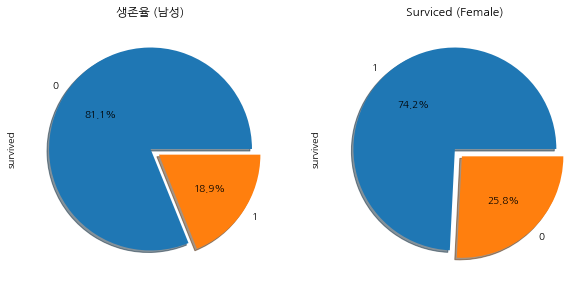

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.set_facecolor('white')
titanic.survived[titanic.sex == 'male'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], explode=[0,0.1], shadow=True)
titanic.survived[titanic.sex == 'female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], explode=[0,0.1], shadow=True)

ax[0].set_title('생존율 (남성)')
ax[1].set_title('Surviced (Female)')
plt.show()

In [16]:
import matplotlib.patches as mpatches #범례 그리기 위한 라이브러리

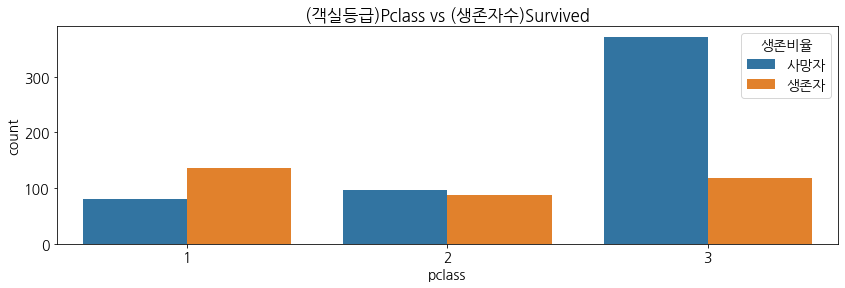

In [59]:
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('(객실등급)Pclass vs (생존자수)Survived')
plt.legend(labels = ['사망자', '생존자'], title='생존비율')
plt.show()

In [17]:
# 상관분석

titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


ValueError: object arrays are not supported

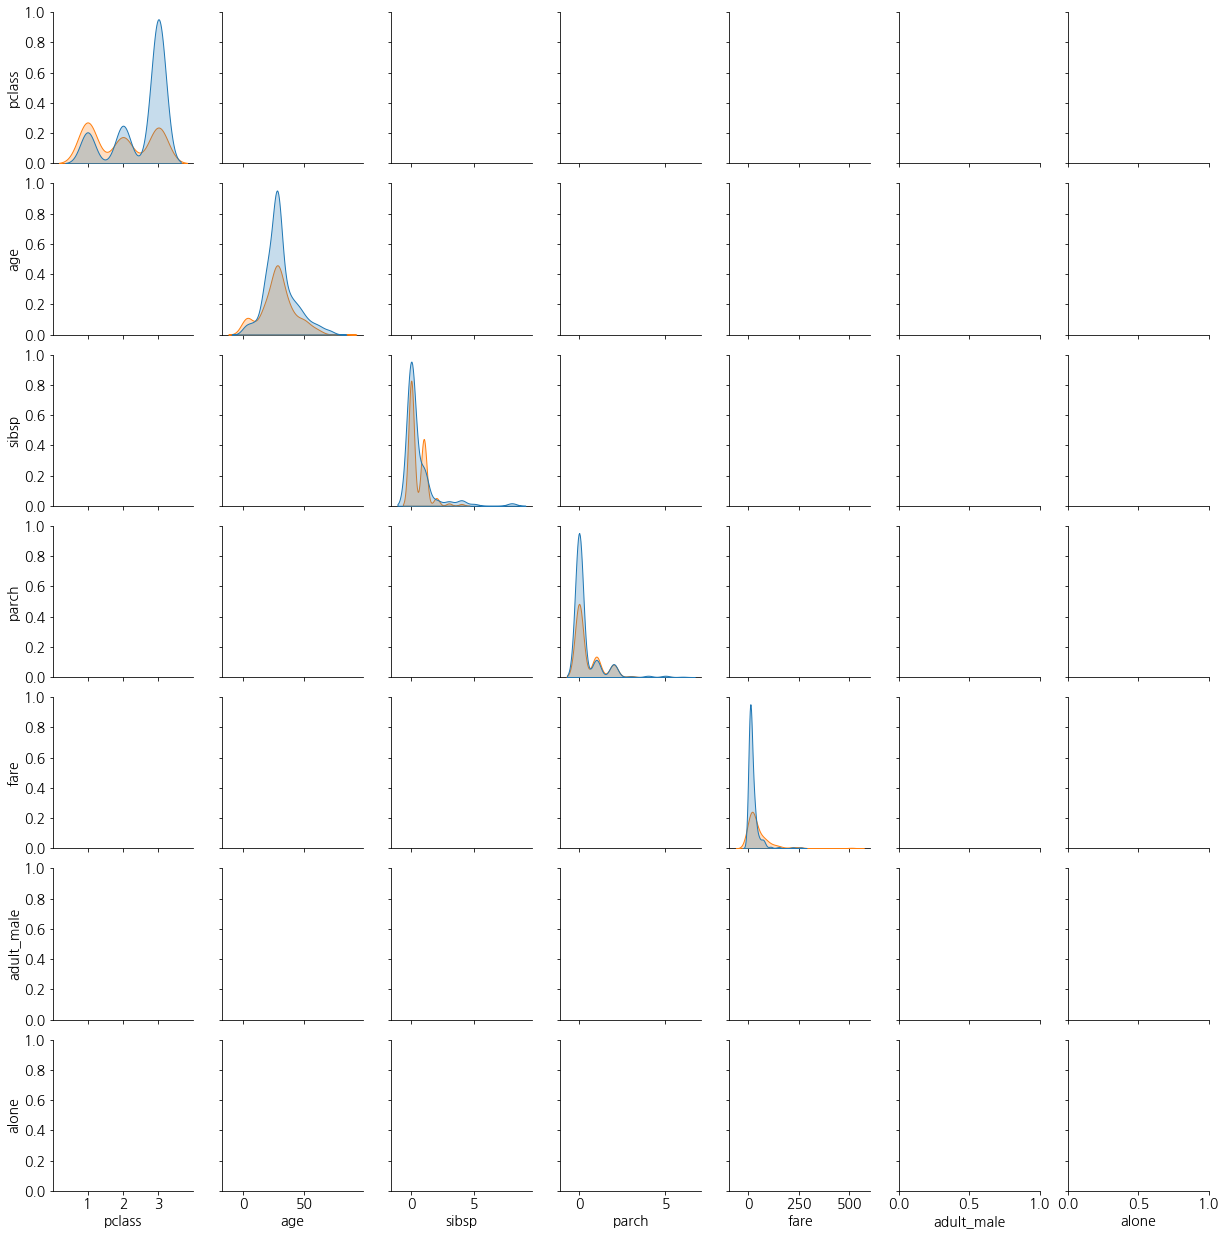

In [67]:
# sns.set(style='ticks', color_codes=True)
sns.pairplot(titanic, hue='survived', vars=['pclass','age','sibsp','parch','fare','adult_male','alone'])
plt.show()
# object, category, bool 형은 상관관계 볼 수 없음. survived는 hue(색상구분값)이므로 따로 상관분석할 필요없음

# 나머지 7개의 변수중에서 볼수 없는 값이 adult_male과 alone 임

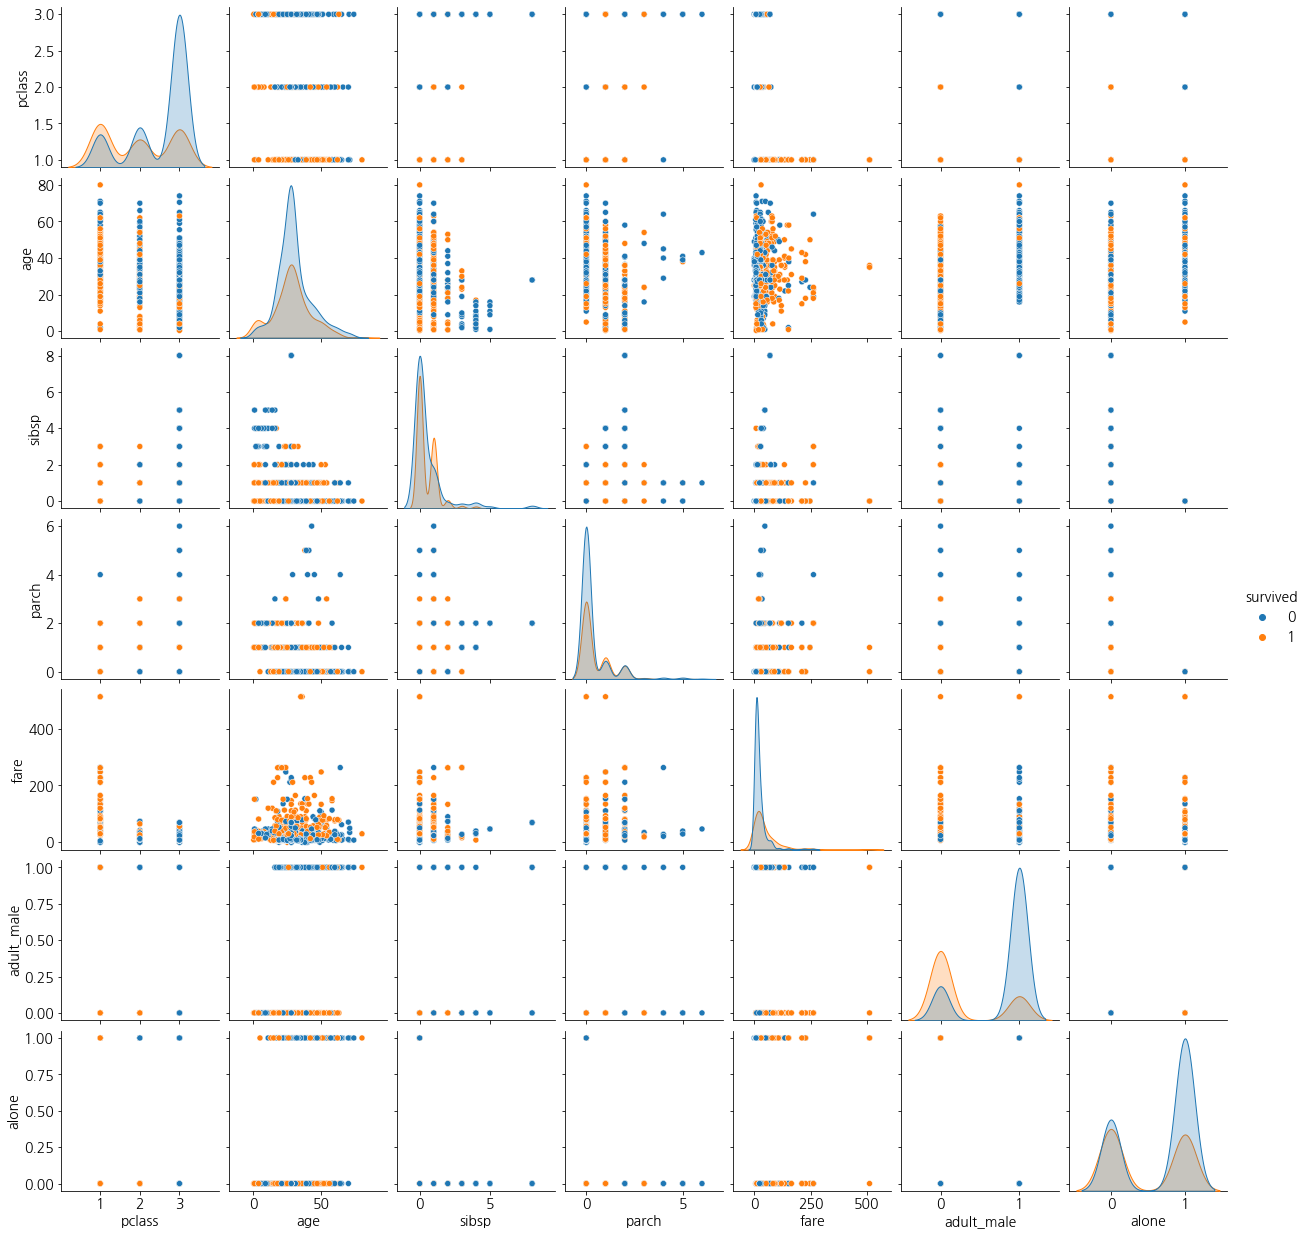

In [68]:
# bool타입은 산점도에서 오류내기때문에 adult_male, alone bool -> int32 형변환 후
titanic = titanic.astype({'adult_male': 'int32', 'alone': 'int32'})
sns.pairplot(titanic, hue='survived')
plt.show()

##### 두 변수 상관관계 시각화

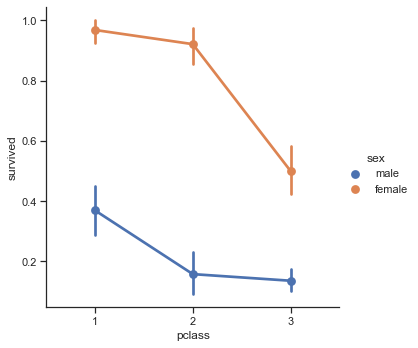

In [37]:
# 객실 등급과 생존 상관관계 seaborn 패키지 catplot 차트로 시각화
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

In [61]:
# age를 히트맵 나타내기 위해 카테고리 형식으로 만들기 위해서 함수를 통해 치환
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    

In [62]:
titanic['age_band'] = titanic['age'].apply(category_age)

In [64]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [66]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [67]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_band,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [68]:
titanic.to_csv('./data/titatic_last.csv', index=False, encoding='utf-8')

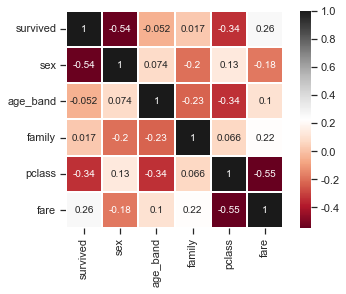

In [72]:
# 히트맵 그리기
heatmap_data = titanic[['survived', 'sex', 'age_band', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdGy
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':10})
plt.show()